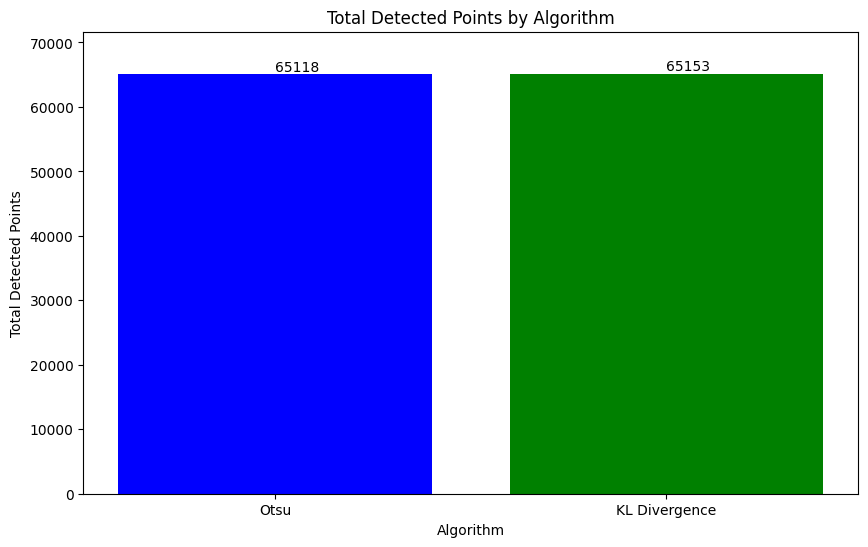

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import os


otsu_file_path = os.path.expanduser('~/catkin_ws/src/uvdar_core/scripts/sim_otsu_topics.csv')
kl_file_path = os.path.expanduser('~/catkin_ws/src/uvdar_core/scripts/sim_kl_topics.csv')

otsu_df = pd.read_csv(otsu_file_path)
kl_df = pd.read_csv(kl_file_path)

# Calculate the total number of points detected by each algorithm
total_points_otsu = otsu_df['roi_detected_points'].sum()
total_points_kl = kl_df['roi_detected_points'].sum()

total_points_otsu, total_points_kl

# Data for plotting
algorithms = ['Otsu', 'KL Divergence']
total_points = [total_points_otsu, total_points_kl]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, total_points, color=['blue', 'green'])

# Adding the total number above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title('Total Detected Points by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Total Detected Points')
plt.ylim(0, max(total_points) * 1.1)  # Set y-axis limit a bit higher to make space for the text

plt.show()

In [32]:
otsu_df.head()

,camera_orientation,timestamp,num_rois,roi_detected_points,roi_threshold_used,roi_kl_divergence,roi_is_valid
0,left,20.664,2,1,23,0.0,1
1,left,20.664,2,1,23,0.0,1
2,left,20.692,2,1,23,0.0,1
3,left,20.692,2,2,23,0.0,1
4,left,20.856,2,2,23,0.0,1


<Figure size 1400x800 with 0 Axes>

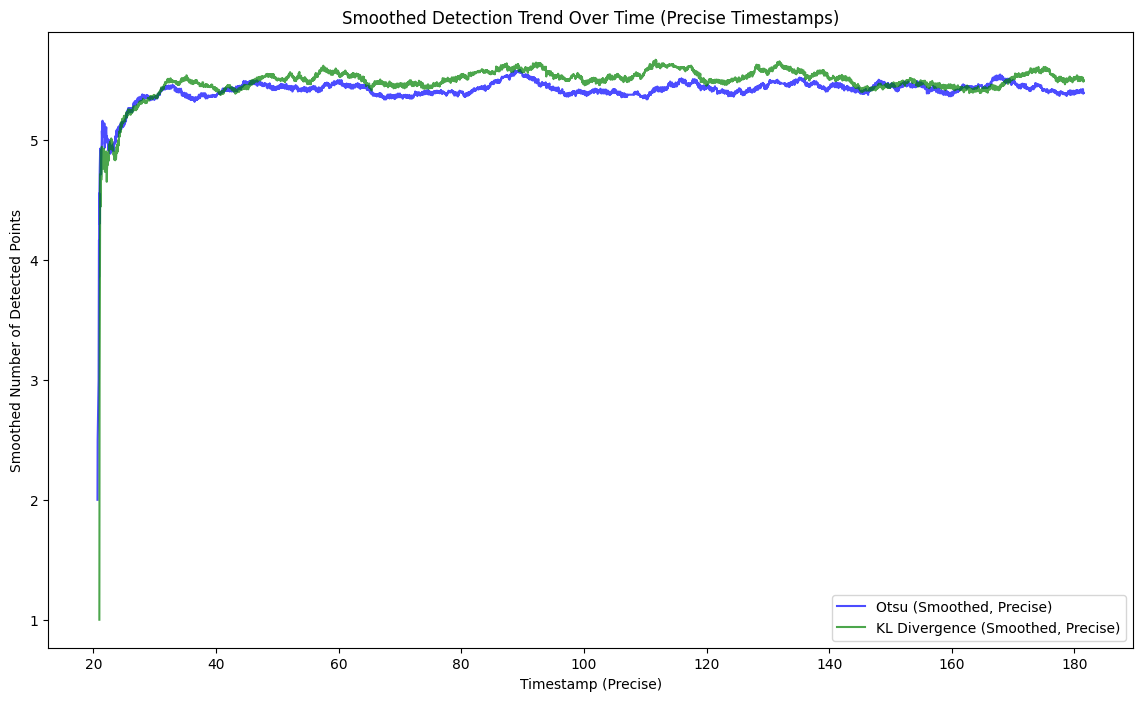

In [52]:
# Plotting
plt.figure(figsize=(14, 8))


# Re-calculate the moving average for the original datasets without rounding but considering the precision
# Re-aggregate using the precise timestamps
otsu_precise_agg = otsu_df.groupby('timestamp')['roi_detected_points'].sum().reset_index()
kl_precise_agg = kl_df.groupby('timestamp')['roi_detected_points'].sum().reset_index()

# Re-calculate the moving average for the precise aggregated datasets
window_size_precise = int(len(otsu_precise_agg) * 0.05)
otsu_precise_agg['moving_avg'] = otsu_precise_agg['roi_detected_points'].rolling(window=window_size_precise, min_periods=1).mean()
kl_precise_agg['moving_avg'] = kl_precise_agg['roi_detected_points'].rolling(window=window_size_precise, min_periods=1).mean()

# Plotting the smoothed trends with precise timestamps
plt.figure(figsize=(14, 8))

plt.plot(otsu_precise_agg['timestamp'], otsu_precise_agg['moving_avg'], label='Otsu (Smoothed, Precise)', color='blue', alpha=0.7)
plt.plot(kl_precise_agg['timestamp'], kl_precise_agg['moving_avg'], label='KL Divergence (Smoothed, Precise)', color='green', alpha=0.7)

plt.title('Smoothed Detection Trend Over Time (Precise Timestamps)')
plt.xlabel('Timestamp (Precise)')
plt.ylabel('Smoothed Number of Detected Points')
#plt.yscale('log')  # Set y-axis to logarithmic scale
#plt.xscale('log')  # Set x-axis to logarithmic scale
plt.legend()

plt.show()


<Figure size 1400x800 with 0 Axes>

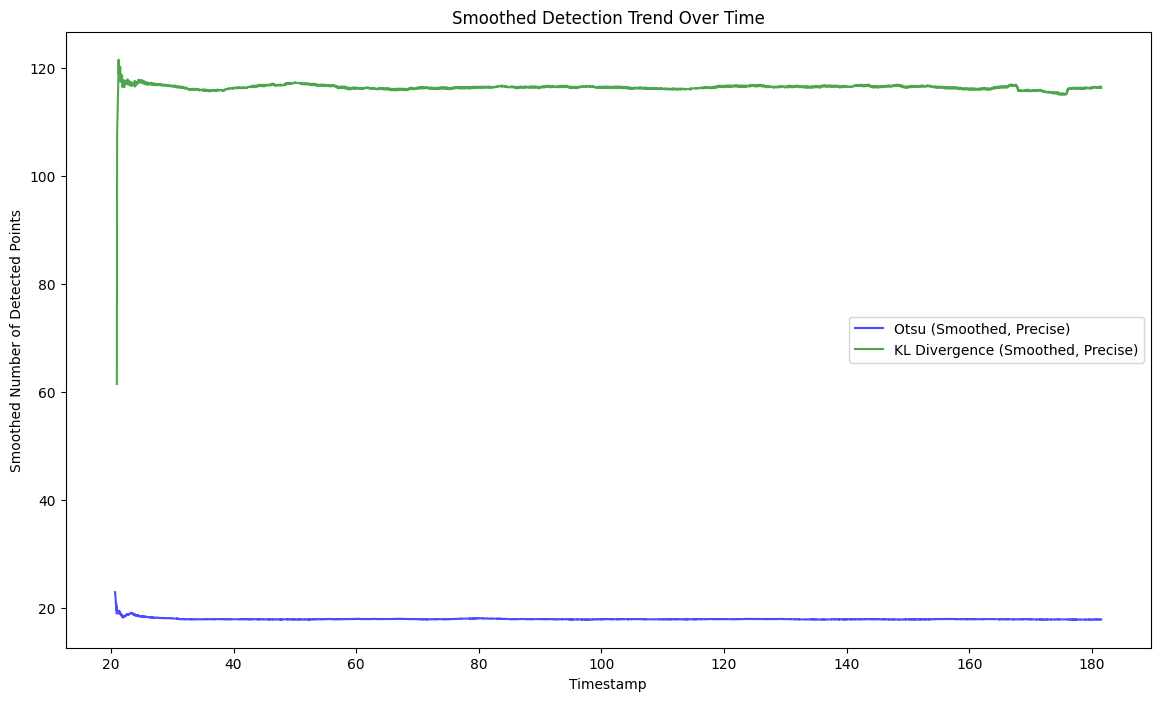

In [96]:
# Plotting
plt.figure(figsize=(14, 8))


# Re-calculate the moving average for the original datasets without rounding but considering the precision
# Re-aggregate using the precise timestamps


otsu_precise_agg = otsu_df.groupby('timestamp')['roi_threshold_used'].mean().reset_index()
kl_precise_agg = kl_df.groupby('timestamp')['roi_threshold_used'].mean().reset_index()


# Re-calculate the moving average for the precise aggregated datasets
window_size_precise = int(len(otsu_precise_agg) * 0.05)
otsu_precise_agg['moving_avg'] = otsu_precise_agg['roi_threshold_used'].rolling(window=window_size_precise, min_periods=1).mean()
kl_precise_agg['moving_avg'] = kl_precise_agg['roi_threshold_used'].rolling(window=window_size_precise, min_periods=1).mean()

# Plotting the smoothed trends with precise timestamps
plt.figure(figsize=(14, 8))

plt.plot(otsu_precise_agg['timestamp'], otsu_precise_agg['moving_avg'], label='Otsu (Smoothed, Precise)', color='blue', alpha=0.7)
plt.plot(kl_precise_agg['timestamp'], kl_precise_agg['moving_avg'], label='KL Divergence (Smoothed, Precise)', color='green', alpha=0.7)

plt.title('Smoothed Detection Trend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Number of Detected Points')
#plt.yscale('log')  # Set y-axis to logarithmic scale
#plt.xscale('log')  # Set x-axis to logarithmic scale
plt.legend()

plt.show()


In [99]:
#Get statistics for the threshold used
otsu_df['roi_threshold_used'].describe(), kl_df['roi_threshold_used'].describe()


(count    37172.000000
 mean        17.990073
 std          5.845097
 min          0.000000
 25%         15.000000
 50%         15.000000
 75%         23.000000
 max         23.000000
 Name: roi_threshold_used, dtype: float64,
 count    37211.000000
 mean       116.279434
 std         28.200269
 min          0.000000
 25%        123.000000
 50%        123.000000
 75%        123.000000
 max        250.000000
 Name: roi_threshold_used, dtype: float64)